# Lab 6A: K-Nearest Neighbor

Scottie YANG Miaoyi

In this lab we will be using the library scikit-learn to train a K-Nearest Neighbor classifier and graph the results.

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Task 1: Load and visualize dataset

- Below, load in the datasets (`file_train.csv`, `file_test.csv`). the training set has 800 samples and the test set has 200 samples.
- Create a figure with two subplots showing the train and test data side-by-side.
    - Be sure to label your subplots with informative titles (which datset are we looking at?).
    - Color-code the points based on their class.
    - Set the figure size to make everything clearly legible (not microscopic).

#### Format of data
- Column 1: x coordinate of a 2D point.
- Column 2: y coordinate of a 2D point.
- Column 3: class. Which spiral arm does the point belong to? Labels: [0, 1]

In [59]:
train_data = np.genfromtxt('data/file_train.csv',delimiter=',')
test_data = np.genfromtxt('data/file_test.csv',delimiter=',')

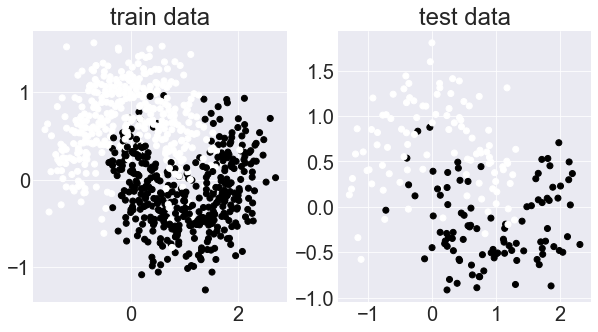

In [60]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(train_data[:,0],train_data[:,1], c= train_data[:,2])
plt.title('train data')
plt.subplot(122)
plt.scatter(test_data[:,0],test_data[:,1], c= test_data[:,2])
plt.title('test data')
plt.show()

## Task 2: Predict dataset and graph results

1. Create a [K-Nearest Neighbors Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) [(More Info)](https://scikit-learn.org/stable/modules/neighbors.html#classification).  Set `n_neighbors` equal to 10.
2. Use the fit method with the coordinate columns of the training dataset as X and the class column as the target.
3. Calculate the accuracy of the classifier with the test data using the score method.
4. Print the accuracy of the classifier.
    

In [61]:
knn = neighbors.KNeighborsClassifier(n_neighbors=10)

In [62]:
knn = knn.fit(train_data[:,[0,1]], train_data[:,2])

In [63]:
accuracy = knn.score(test_data[:,[0,1]],test_data[:,2])

In [64]:
print(accuracy)
print("Your accuracy should be 0.92")

0.92
Your accuracy should be 0.92


## Task 3: Visualize class boundaries

Visualize how different regions of the (2D) dataspace would be classified based on the results of the trained KNN Classifier from Task 2.

1. Create a meshgrid for predicting values
    1. Create a [linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) for your x-axis and your y-axis
        2. Set the start argument to the min value of your column -.5
        3. Set the end argument to the max value of your column +.5
        4. Set the number of samples to 300
    2. Assign `x_samples` and `y_samples` to a [meshgrid](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html) with the linspace as the arguments for x1 and x2.
    3. [Flatten](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matrix.flatten.html)`x_samples` and `y_samples` and save into new variables.
    3. Create a list of x and y sample coordinate pairs, by [column stacking](https://docs.scipy.org/doc/numpy/reference/generated/numpy.column_stack.html) the flattened x_samples and y_samples
2. Use your coordinate pairs as predict inputs for the knn classifier you created in Task 2. 
3. Reshape the results to the same shape as `x_samples`.
1. In 1 plot, graph your results
    1. Create two [ListedColormap](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.colors.ListedColormap.html) [(example)](https://matplotlib.org/3.2.1/tutorials/colors/colormap-manipulation.html)
        1. One should have dark values of 2 colors
        1. One should have light values of the same 2 colors
    1. Use [pcolormesh](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.pcolormesh.html) to plot your predicted values grid.
        1. Plot x_samples, y_samples and your reshaped predicted results and the light value colormap.
    2. Plot the training points with using a scatter plot with the dark value colormap.
    3. Title your plot and label the axis.

In [65]:
x_col = np.append(train_data[:,0],test_data[:,0])
y_col = np.append(train_data[:,1],test_data[:,1])
X = np.linspace(np.amin(x_col)-0.5, np.amax(x_col)+0.5, num=300)
Y = np.linspace(np.amin(y_col)-0.5, np.amax(y_col)+0.5, num=300)

In [66]:
xv, yv = np.meshgrid(X, Y)

In [67]:
x_flatten = np.asmatrix(xv).flatten().reshape((90000,1))
y_flatten = np.asmatrix(yv).flatten().reshape((90000,1))

In [68]:
coordinate_pairs = np.column_stack((x_flatten, y_flatten))

In [69]:
predicted_values = knn.predict(coordinate_pairs).reshape((xv.shape))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [70]:
cmap_light = ListedColormap(["lightblue","lightgreen"])
cmap_dark = ListedColormap(["darkblue","darkgreen"])

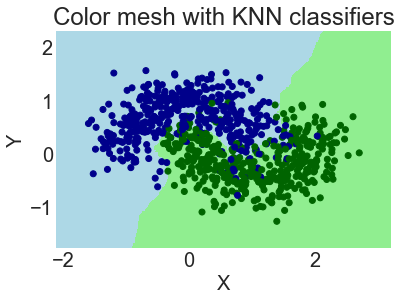

In [71]:
plt.pcolormesh(xv, yv, predicted_values, cmap=cmap_light, shading='auto')
plt.scatter(train_data[:,0], train_data[:,1], c = train_data[:,2], cmap=cmap_dark)
plt.title('Color mesh with KNN classifiers')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()